In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
# https://towardsdatascience.com/take-your-histograms-to-the-next-level-using-matplotlib-5f093ad7b9d3
# https://towardsdatascience.com/take-your-histograms-to-the-next-level-using-matplotlib-5f093ad7b9d3


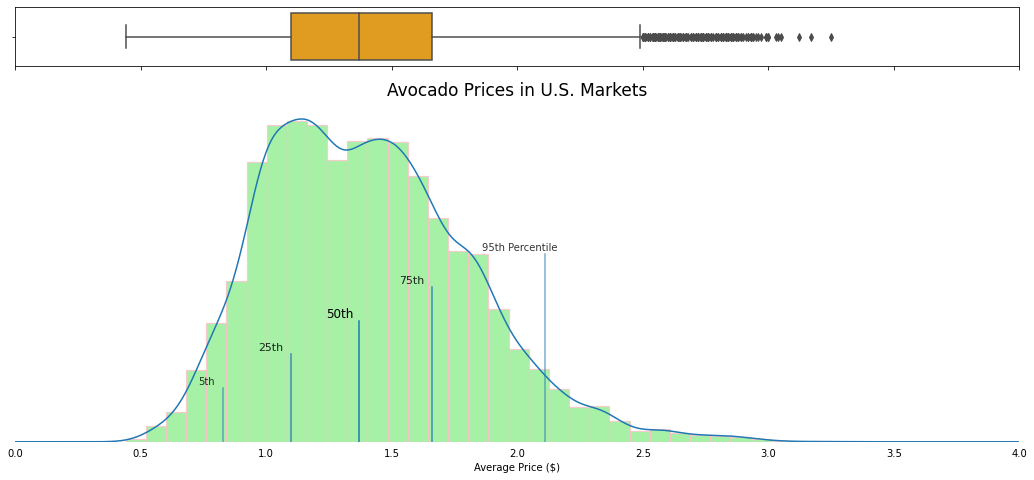

In [3]:
avocado = pd.read_csv("avocado.csv")["AveragePrice"]

# fig, ax = plt.subplots(figsize = (10,6))
# creating a figure composed of two matplotlib.Axes objects (ax_box and ax_hist)
fig, (ax_box, ax) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)}, figsize=(18,8))


# Plot
    # Plot histogram
avocado.plot(kind = "hist", density = True, alpha = 0.8, bins = 35,
             color = 'lightgreen',
             edgecolor='pink', linewidth=1.2,
             ax = ax) # change density to true, because KDE uses density
    # Plot KDE
avocado.plot(kind = "kde")
sns.boxplot(avocado, ax=ax_box, color = 'orange')


    # Quantile lines
quant_5, quant_25, quant_50, quant_75, quant_95 = avocado.quantile(0.05), avocado.quantile(0.25), avocado.quantile(0.5), avocado.quantile(0.75), avocado.quantile(0.95)
quants = [[quant_5, 0.6, 0.16], [quant_25, 0.8, 0.26], [quant_50, 1, 0.36],  [quant_75, 0.8, 0.46], [quant_95, 0.6, 0.56]]
for i in quants:
    ax.axvline(i[0], alpha = i[1], ymax = i[2], linestyle = "solid")


# X
ax.set_xlabel("Average Price ($)")
    # Limit x range to 0-4
x_start, x_end = 0, 4
ax.set_xlim(x_start, x_end)

# Y
ax.set_ylim(0, 1)
ax.set_yticklabels([])
ax.set_ylabel("")

# Annotations
ax.text(quant_5-.1, 0.17, "5th", size = 10, alpha = 0.8)
ax.text(quant_25-.13, 0.27, "25th", size = 11, alpha = 0.85)
ax.text(quant_50-.13, 0.37, "50th", size = 12, alpha = 1)
ax.text(quant_75-.13, 0.47, "75th", size = 11, alpha = 0.85)
ax.text(quant_95-.25, 0.57, "95th Percentile", size = 10, alpha =.8)

# Overall
ax.grid(False)
ax.set_title("Avocado Prices in U.S. Markets", size = 17, pad = 10)

    # Remove ticks and spines
ax.tick_params(left = False, bottom = False)
for ax, spine in ax.spines.items():
    spine.set_visible(False)
    
plt.show()

## Convert the notebook to HTML

In [4]:
%%shell
# jupyter nbconvert --to html /content/Mod08_practice_histograms_iqr.ipynb